In [1]:

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (15/15), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:

data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [3]:
import os
filenames= [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [4]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [5]:
train_lines = get_lines(data_dir + "/train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [6]:
len(train_lines)

210040

In [7]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []


  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()


      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples


In [8]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 464 ms, sys: 94.3 ms, total: 558 ms
Wall time: 558 ms


(180040, 30212, 30135)

In [9]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [10]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [11]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

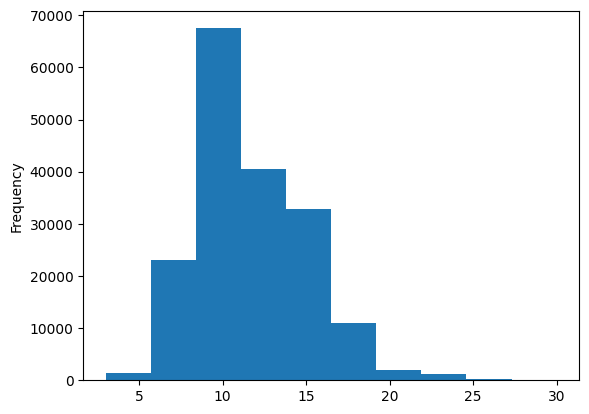

In [12]:
train_df.total_lines.plot.hist()

In [13]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

In [14]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [15]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
import tensorflow as tf
tf.constant(train_labels_one_hot)
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())
test_lables_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(train_sentences, train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [20]:
baseline_pred = model_0.predict(val_sentences)
baseline_pred

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_F1_score(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_prediction, model_recall_, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average ="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_prediction,
                  "recall": model_recall_,
                  "f1": model_f1}

  return model_results

In [22]:
model_0_results=calculate_F1_score(val_labels_encoded, baseline_pred)
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [24]:
sent_lens= [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <BarContainer object of 10 artists>)

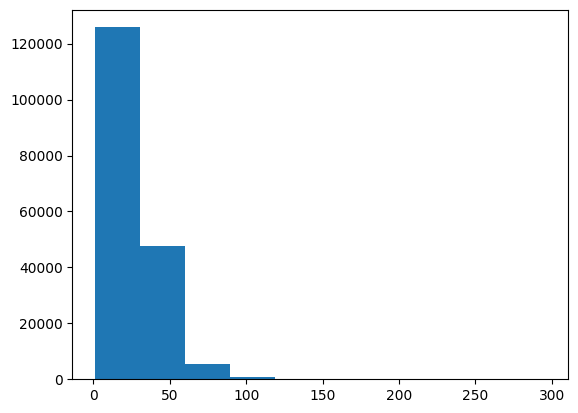

In [25]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins= 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e4ab012bac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e4ab0154040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e4ab012b820>],
 'medians': [<matplotlib.lines.Line2D at 0x7e4ab0154580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e4ab0154820>],
 'means': []}

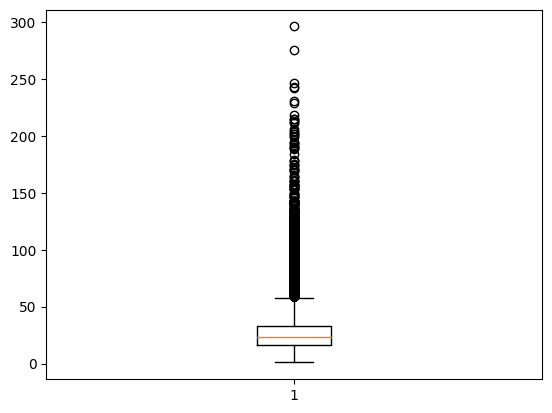

In [26]:
plt.boxplot(sent_lens)

In [27]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [28]:
max_tokens = 68000

In [29]:

# Create text vectorizer

# After TensorFlow 2.6
from tensorflow.keras.layers import TextVectorization

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorize_layer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55)

In [30]:
vectorize_layer.adapt(train_sentences)

In [31]:
import random
target_sentence = random.choice(train_sentences)
print(f"/nText /n {target_sentence}")
print(f"/nLength of tect {len(target_sentence)}")
print(f"/nVectorized text {vectorize_layer([target_sentence])}")

/nText /n the primary endpoint was the change from baseline in the proportion of symptom-free days ( sfd ) .
/nLength of tect 98
/nVectorized text [[    2    56   349    10     2   133    27    49     5     2   443     4
  10139    84  6470     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [32]:


rct_20k_text_vocab = vectorize_layer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [33]:


token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim=128,

                               mask_zero=True,
                               name="token_embedding")


print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = vectorize_layer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
the primary endpoint was the change from baseline in the proportion of symptom-free days ( sfd ) .

Sentence after vectorization (before embedding):
[[    2    56   349    10     2   133    27    49     5     2   443     4
  10139    84  6470     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[-0.04484396  0.0262884   0.02694209 ... -0.04803127 -0.04563248
   -0.04799462]
  [ 0.03134901  0.01360394 -0.01653815 ...  0.03611374  0.00878995
   -0.01754408]
  [-0.02186344  0.03735356 -0.00141096 ...  0.00649538  0.00248627
   -0.03605205]
  ...
  [ 0.01144886  0.00182713  0.013968   ... -0.03594531 -0.00867734
    0.01755874]
  [ 0.01144886  0.00182713  0.013968   ... -0.03594531 -0.00867734
    0.01755874]
  [ 0.01144886  0.00182713  0.

In [34]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [35]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [36]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = vectorize_layer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [37]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [38]:
history_model_1 = model_1.fit(train_dataset, steps_per_epoch = int(0.1 * len(train_dataset)), epochs = 3, validation_data=val_dataset, validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 21s 33ms/step - loss: 0.9128 - accuracy: 0.6388 - val_loss: 0.6798 - val_accuracy: 0.7394
Epoch 2/3
562/562 [==============================] - 5s 10ms/step - loss: 0.6565 - accuracy: 0.7565 - val_loss: 0.6282 - val_accuracy: 0.7696
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6172 - accuracy: 0.7740 - val_loss: 0.5957 - val_accuracy: 0.7859


In [39]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5991 - accuracy: 0.7862


[0.599128782749176, 0.7861776947975159]

In [40]:
model_1_preds = model_1.predict(val_dataset)
model_1_preds = tf.argmax(model_1_preds, axis=1)
model_1_results = calculate_F1_score(val_labels_encoded, model_1_preds)

945/945 [==============================] - 2s 2ms/step


In [41]:
model_1_results

{'accuracy': 78.61776777439428,
 'precision': 0.7834617826892095,
 'recall': 0.7861776777439428,
 'f1': 0.7841617396514359}

In [42]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [43]:
inputs = layers.Input(shape= [], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])


In [44]:
history_model_2 = model_2.fit(train_dataset, steps_per_epoch = int(0.1 * len(train_dataset)), epochs = 3, validation_data=val_dataset, validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 13s 15ms/step - loss: 0.9163 - accuracy: 0.6470 - val_loss: 0.7965 - val_accuracy: 0.6908
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7678 - accuracy: 0.7016 - val_loss: 0.7522 - val_accuracy: 0.7104
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7503 - accuracy: 0.7126 - val_loss: 0.7352 - val_accuracy: 0.7161


In [45]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 17s 17ms/step - loss: 0.7390 - accuracy: 0.7148


[0.7389665246009827, 0.7148153185844421]

In [97]:
model_2_preds = model_2.predict(val_dataset)
model_preds_2 =tf.argmax(model_2_preds, axis=1)

model_2_scores = calculate_F1_score(val_labels_encoded, model_preds_2)
model_2_scores

945/945 [==============================] - 12s 12ms/step


{'accuracy': 71.4815305176751,
 'precision': 0.7150786922603979,
 'recall': 0.714815305176751,
 'f1': 0.7121293630263936}

In [47]:
def split_chars(text):
  return " ".join(list(text))



In [48]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[:10])

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .', 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .', 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a n 

In [49]:
chars_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(chars_lens)
mean_char_len

149.3662574983337

{'whiskers': [<matplotlib.lines.Line2D at 0x7e49b66c9a80>,
 'caps': [<matplotlib.lines.Line2D at 0x7e49b66c9fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e49b66c97e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e49b66ca500>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e49b66ca7a0>],
 'means': []}

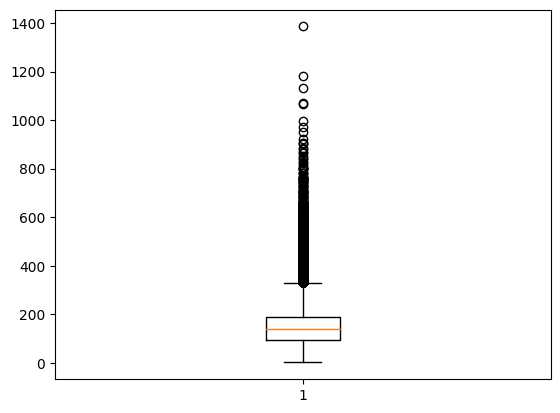

In [50]:
plt.boxplot(chars_lens)

(array([9.2691e+04, 7.6343e+04, 9.6890e+03, 1.0890e+03, 1.6700e+02,
        4.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03]),
 <BarContainer object of 10 artists>)

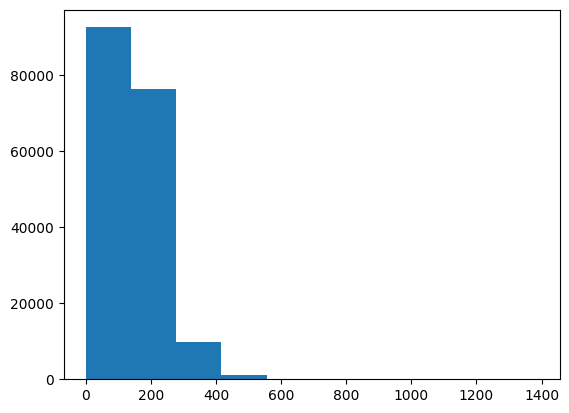

In [51]:
plt.hist(chars_lens, bins=10)

In [52]:
output_seq_len = int(np.percentile(chars_lens, 95))
output_seq_len

290

In [53]:
random.choice(train_sentences)
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
NUM_CHAR = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR, output_sequence_length = output_seq_len)

In [54]:
char_vectorizer.adapt(train_chars)

In [55]:
char_vocab = char_vectorizer.get_vocabulary()
print(len(char_vocab), char_vocab[:5], char_vocab[-5:])

28 ['', '[UNK]', 'e', 't', 'i'] ['k', 'x', 'z', 'q', 'j']


In [56]:
char_embed = layers.Embedding(input_dim = len(char_vocab), output_dim = 25, mask_zero=True)

In [57]:
inputs = layers.Input(shape= (1,), dtype="string")
char_vectors = char_vectorizer(inputs)
embedding_layer = char_embed(char_vectors)
x = layers.Conv1D(128, kernel_size = 5, padding = "same", activation="relu")(embedding_layer)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.compile(loss= "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [58]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 290)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 128)          16128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5)                 645 

In [59]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [60]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.2 * len(train_char_dataset)),
                              epochs=4,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.2 * len(val_char_dataset)))

Epoch 1/4
1125/1125 [==============================] - 12s 9ms/step - loss: 1.0807 - accuracy: 0.5709 - val_loss: 0.8787 - val_accuracy: 0.6672
Epoch 2/4
1125/1125 [==============================] - 8s 7ms/step - loss: 0.8477 - accuracy: 0.6719 - val_loss: 0.7824 - val_accuracy: 0.7016
Epoch 3/4
1125/1125 [==============================] - 7s 6ms/step - loss: 0.7954 - accuracy: 0.6971 - val_loss: 0.7301 - val_accuracy: 0.7237
Epoch 4/4
1125/1125 [==============================] - 8s 7ms/step - loss: 0.7543 - accuracy: 0.7117 - val_loss: 0.7008 - val_accuracy: 0.7399


In [61]:
model_3_pred_probs = model_3.predict(val_char_dataset)

945/945 [==============================] - 3s 3ms/step


In [62]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)

In [63]:
model_3_score =calculate_F1_score(val_labels_encoded, model_3_preds)
model_3_score

{'accuracy': 72.86177677743943,
 'precision': 0.7250420410280097,
 'recall': 0.7286177677743942,
 'f1': 0.7249640186146549}

In [64]:
inputs = layers.Input(shape= [], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
token_output = layers.Dense(128, activation="relu")(pretrained_embedding)
token_model = tf.keras.Model(inputs, token_output)

char_inputs = layers.Input(shape=(1,), dtype = tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(48))(char_embeddings)
char_model = tf.keras.Model(inputs= char_inputs, outputs= char_bi_lstm)


token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])



combined_dropout = layers.Dropout(0.5)(token_char_concat)
#expanded_combined_dropout = tf.expand_dims(combined_dropout, axis=0)
#char_bi_lstm_2 = layers.Bidirectional(layers.LSTM(48))(expanded_combined_dropout)

combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
combined_dropout = layers.Dropout(0.5)(combined_dense)
output = layers.Dense(5, activation="softmax")(combined_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input], outputs = output)

In [65]:
model_4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 290)                  0         ['char_input[0][0]']          
 Vectorization)                                                                                   
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['input_4[0][0]']       

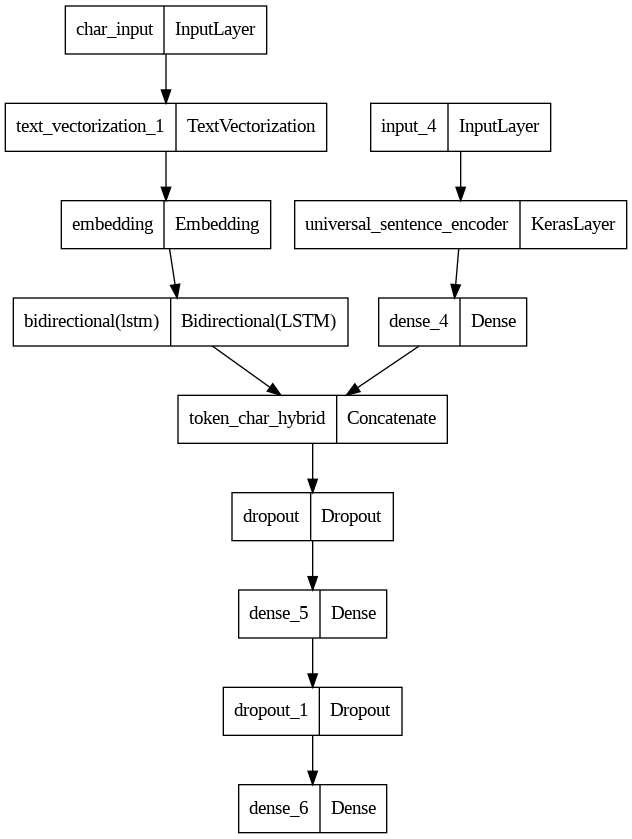

In [99]:
from keras.utils import plot_model
plot_model(model_4)

In [100]:
model_4.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [101]:

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [102]:

model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.2 * len(train_char_token_dataset)),
                              epochs=4,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.2 * len(val_char_token_dataset)))

Epoch 1/4
1125/1125 [==============================] - 68s 52ms/step - loss: 0.8801 - accuracy: 0.6556 - val_loss: 0.7085 - val_accuracy: 0.7269
Epoch 2/4
1125/1125 [==============================] - 55s 49ms/step - loss: 0.7499 - accuracy: 0.7172 - val_loss: 0.6647 - val_accuracy: 0.7512
Epoch 3/4
1125/1125 [==============================] - 51s 46ms/step - loss: 0.7407 - accuracy: 0.7191 - val_loss: 0.6445 - val_accuracy: 0.7550
Epoch 4/4
1125/1125 [==============================] - 58s 51ms/step - loss: 0.7019 - accuracy: 0.7352 - val_loss: 0.6282 - val_accuracy: 0.7629


In [103]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.6304 - accuracy: 0.7610


[0.630353569984436, 0.7609559297561646]

In [104]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_preds = tf.argmax(model_4_pred_probs, axis=1)


945/945 [==============================] - 22s 20ms/step


In [105]:
model_4_results = calculate_F1_score(val_labels_encoded, model_preds)
model_4_results

{'accuracy': 76.09559115583212,
 'precision': 0.7590141780031511,
 'recall': 0.7609559115583212,
 'f1': 0.7576738866352443}

In [66]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

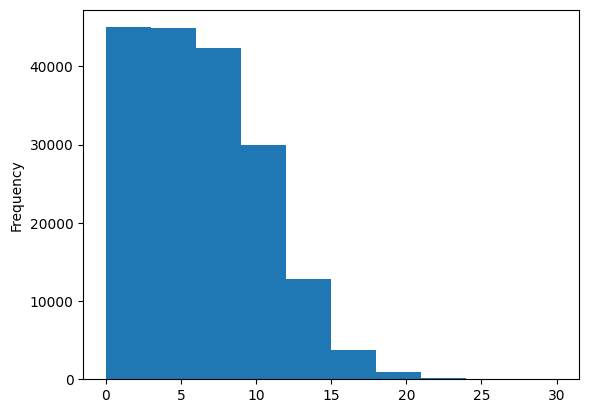

In [67]:
train_df.line_number.plot.hist()

In [89]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
train_line_numbers_one_hot


<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

(array([ 1393., 23102., 67507., 40551., 32807., 11026.,  2051.,  1223.,
          291.,    89.]),
 array([ 3. ,  5.7,  8.4, 11.1, 13.8, 16.5, 19.2, 21.9, 24.6, 27.3, 30. ]),
 <BarContainer object of 10 artists>)

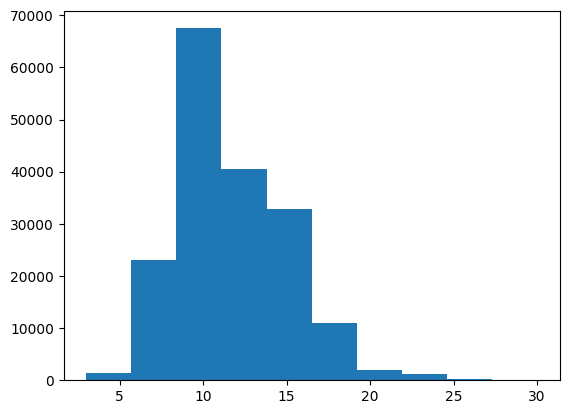

In [69]:
plt.hist(train_df["total_lines"], bins=10)

In [70]:
np.percentile(train_df.total_lines, 95)

18.0

In [72]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth = 20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth = 20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth = 20)
train_total_lines_one_hot

<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [84]:
token_inputs = layers.Input(shape= [], dtype="string")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(64, activation="relu")(token_embeddings)
token_outputs = layers.Dense(128, activation="relu")(token_output)
token_model = tf.keras.Model(inputs=token_inputs,outputs= token_outputs)

char_inputs= layers.Input(shape=(1,), dtype = "string")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(48))(char_embeddings)
char_model = tf.keras.Model(inputs= char_inputs, outputs=char_bi_lstm)

line_number_inputs = layers.Input(shape= (15,), dtype=tf.float32)
x= layers.Dense(32)(line_number_inputs)
x= layers.Dense(16, activation="relu")(x)
line_numbers_model = tf.keras.Model(line_number_inputs,x)


total_line_inputs = layers.Input(shape= (20,), dtype=tf.float32)
x= layers.Dense(32)(total_line_inputs)
x= layers.Dense(16, activation="relu")(x)
total_line_output = tf.keras.Model(total_line_inputs,x)


combined_embeddings = layers.Concatenate()([token_model.output, char_model.output])

z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)


all_embeddings = layers.Concatenate()([line_numbers_model.output, total_line_output.output, z ])


output_layer = layers.Dense(5, activation="softmax")(all_embeddings)

model_5 = tf.keras.Model(inputs = [line_numbers_model.input,total_line_output.input,token_model.input, char_model.input], outputs=output_layer)

In [85]:
model_5.summary()

Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_34 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_35 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['input_34[0][0]']            
  (KerasLayer)                                            24                                      
                                                                                                  
 text_vectorization_1 (Text  (None, 290)                  0         ['input_35[0][0]']     

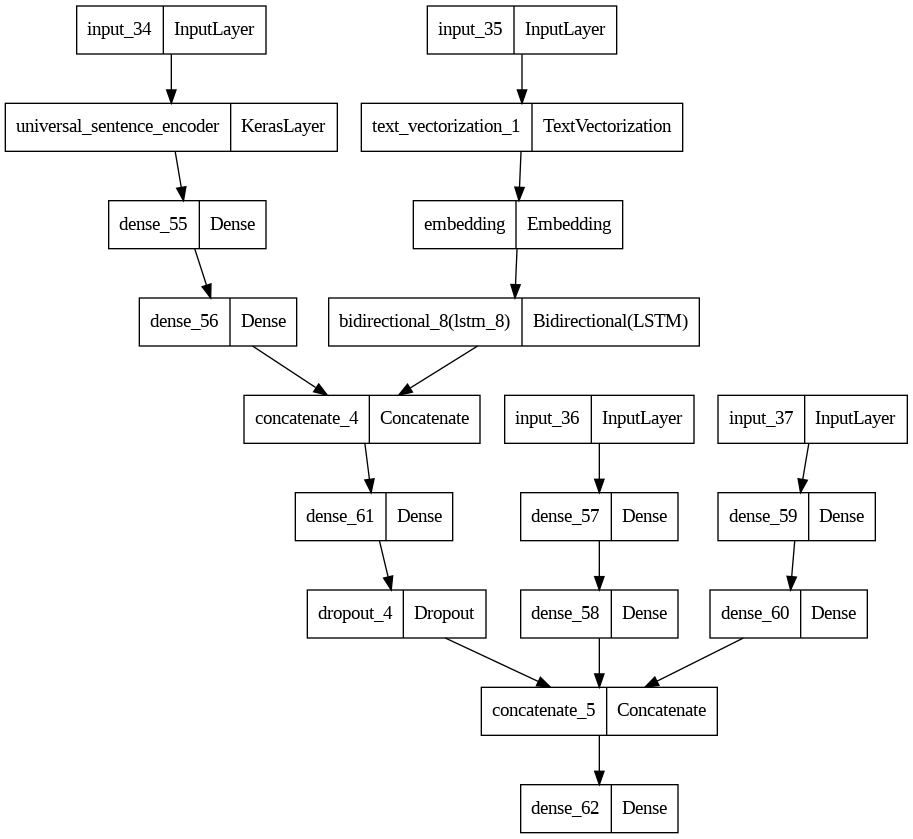

In [86]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [87]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), optimizer = tf.keras.optimizers.Adam(), metrics= ["accuracy"])

In [90]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

train_pos_char_token_dataset, val_pos_char_token_data

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(15,), dtype=tf.float32, name=None), TensorSpec(shape=(20,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>)

In [91]:
history_model_5 = model_5.fit(train_pos_char_token_dataset, steps_per_epoch = int(0.1 * len(train_pos_char_token_dataset)), epochs = 4, validation_data= val_pos_char_token_dataset, validation_steps = int(0.1* len(val_pos_char_token_dataset)))

Epoch 1/4
562/562 [==============================] - 45s 56ms/step - loss: 1.0885 - accuracy: 0.7237 - val_loss: 0.9749 - val_accuracy: 0.8098
Epoch 2/4
562/562 [==============================] - 29s 52ms/step - loss: 0.9660 - accuracy: 0.8138 - val_loss: 0.9487 - val_accuracy: 0.8291
Epoch 3/4
562/562 [==============================] - 40s 71ms/step - loss: 0.9489 - accuracy: 0.8211 - val_loss: 0.9367 - val_accuracy: 0.8298
Epoch 4/4
562/562 [==============================] - 33s 58ms/step - loss: 0.9381 - accuracy: 0.8353 - val_loss: 0.9287 - val_accuracy: 0.8321


In [93]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose =1)
model_5_pred_probs

945/945 [==============================] - 38s 37ms/step


array([[0.69115967, 0.09379431, 0.01313685, 0.18925573, 0.01265345],
       [0.73636687, 0.06411701, 0.04491593, 0.14530945, 0.00929072],
       [0.42591837, 0.07357494, 0.10998597, 0.33448645, 0.0560343 ],
       ...,
       [0.02810596, 0.11898562, 0.03727493, 0.02925813, 0.78637534],
       [0.0306004 , 0.29263753, 0.07734621, 0.03042302, 0.56899285],
       [0.0500339 , 0.8489842 , 0.0566275 , 0.01431285, 0.03004152]],
      dtype=float32)

In [94]:
model_5_preds =tf.argmax(model_5_pred_probs, axis=1)
model_5_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [96]:
model_5_score = calculate_F1_score(val_labels_encoded, model_5_preds)
model_5_score

{'accuracy': 83.55951277638025,
 'precision': 0.8432748877664957,
 'recall': 0.8355951277638025,
 'f1': 0.83034083613069}

In [112]:
import pandas as pd

all_models = pd.DataFrame({
    "model_0": model_0_results,
    "model_1": model_1_results,
    "model_2": model_2_scores,
    "model_3": model_3_score,
    "model_4": model_4_results,
    "model_5": model_5_score
})
all_models = all_models.transpose()
all_models

,accuracy,precision,recall,f1
model_0,72.183238,0.718647,0.721832,0.698925
model_1,78.617768,0.783462,0.786178,0.784162
model_2,71.481531,0.715079,0.714815,0.712129
model_3,72.861777,0.725042,0.728618,0.724964
model_4,76.095591,0.759014,0.760956,0.757674
model_5,83.559513,0.843275,0.835595,0.830341


In [113]:
all_models["accuracy"] = all_models["accuracy"] / 100
all_models

,accuracy,precision,recall,f1
model_0,0.721832,0.718647,0.721832,0.698925
model_1,0.786178,0.783462,0.786178,0.784162
model_2,0.714815,0.715079,0.714815,0.712129
model_3,0.728618,0.725042,0.728618,0.724964
model_4,0.760956,0.759014,0.760956,0.757674
model_5,0.835595,0.843275,0.835595,0.830341


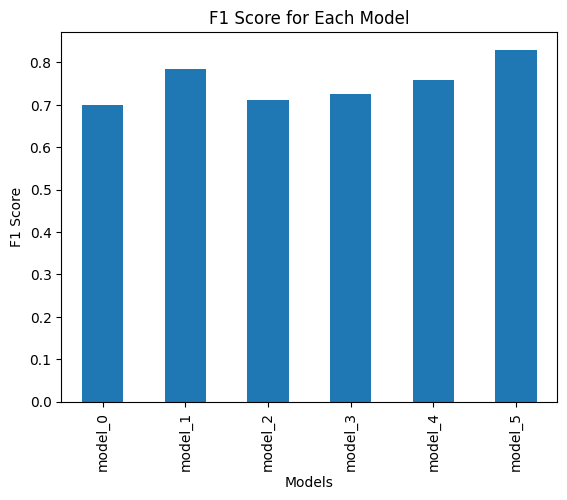

In [116]:
all_models["f1"].plot.bar()

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Model')

# Display the plot
plt.show()

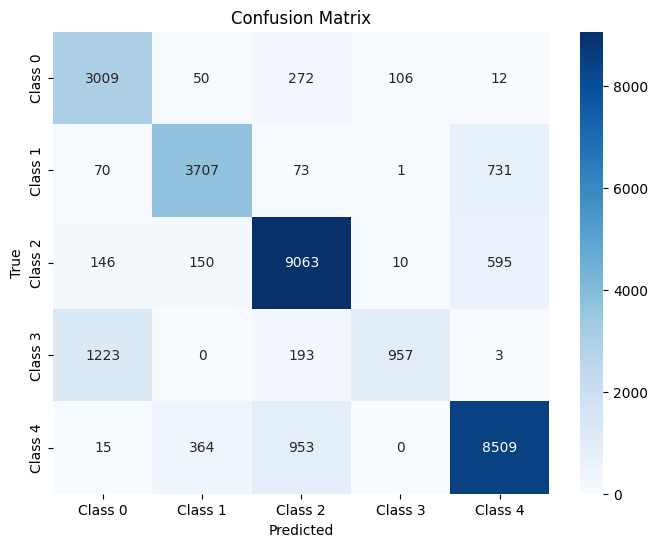

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

conf_matrix = confusion_matrix(val_labels_encoded, model_5_preds)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

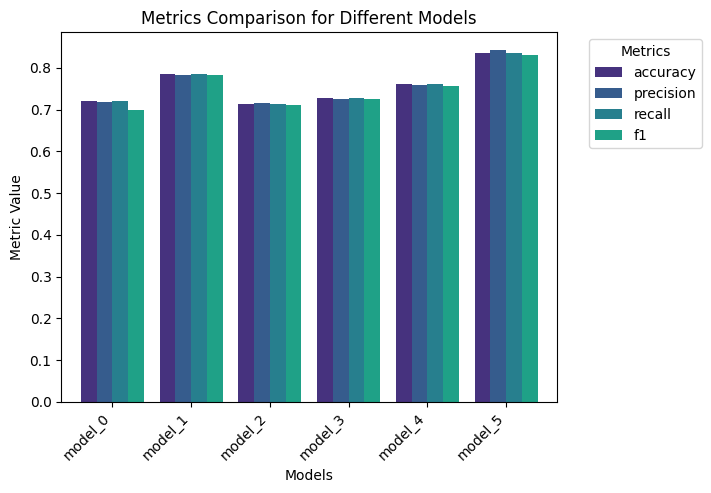

In [120]:
plt.figure(figsize=(10, 6))
sns.set_palette('viridis')  # You can choose another palette if you prefer
all_models.plot(kind='bar', width=0.8)
plt.title('Metrics Comparison for Different Models')
plt.ylabel('Metric Value')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

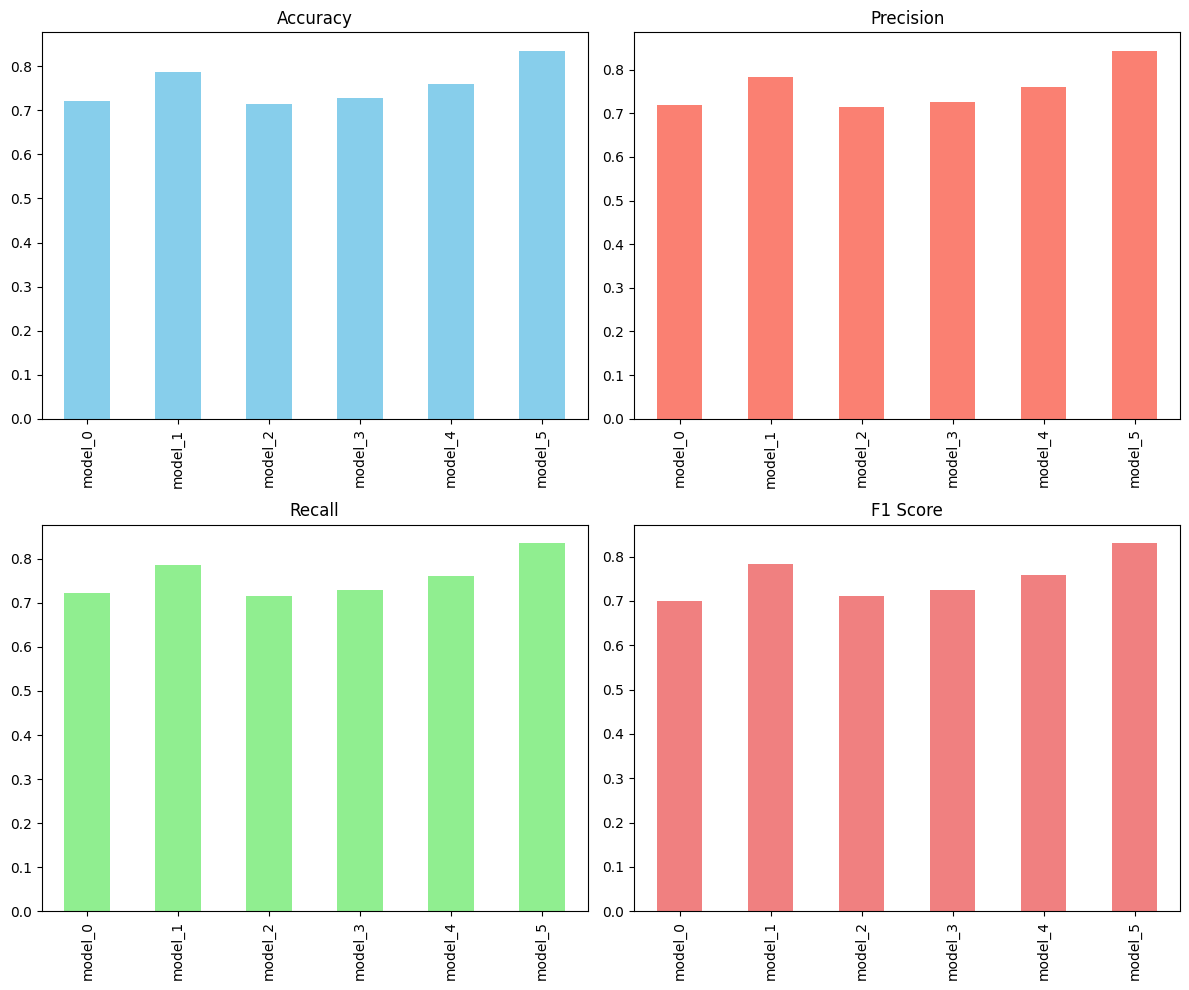

In [121]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot accuracy
all_models['accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy')

# Plot precision
all_models['precision'].plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Precision')

# Plot recall
all_models['recall'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Recall')

# Plot F1 score
all_models['f1'].plot(kind='bar', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout()
plt.show()